### Table of Experiments

#### exp1
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  No Additional supressional activity at 1000ms for 50ms

#### exp2
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  Additional supressional activity at 1000ms for 50ms

In [16]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

In [26]:
sys.path.append("demyelination/") # we need this to successfully read pickle files

In [2]:
import pipeline as pipeline

In [11]:
def preparedf (dataobjs, expname):
    # input dataframe
    # output organized data
    if len(dataobjs) == 0:
        raise Exception("No activity files found.")

    parts = dataobjs[0].spikeobj.keys()

    df = pd.DataFrame()

    for part in parts:
        for data in dataobjs:
            data.spikeobj[part].time_offset(250)
            df = df.append({
                #"nux" : data.params['exp1_nuX'],
                "nux" : data.params[expname + '_nuX'],
                "gamma" : data.params['gamma'],
                "brainPart" : part,
                "meanSpkRate" : data.spikeobj[part].mean_rate(),
                "pearsonCoeff" : data.metrics['pearsoncoeff'][part],
                "cvIsi" : data.spikeobj[part].cv_isi().mean()
                }, ignore_index=True)

    sortingParams = ["nux", "gamma"]
    df = df.sort_values(by=sortingParams)

    return df

## Exp1

In [ ]:
files = pipeline.readfiles("demyelination/data/exp1/activity");
df = preparedf(files, 'exp1');

In [20]:
df

nux  gamma brainPart  meanSpkRate  pearsonCoeff     cvIsi
26     8      2       MGN     1.859416      0.001258  0.623078
120    8      2       MGN     1.709888      0.001692  0.612607
170    8      2       TRN     2.105432     -0.002281       NaN
264    8      2       TRN     2.092790     -0.000546  0.618333
91     8      3       MGN     1.594842     -0.001714  0.612255
..   ...    ...       ...          ...           ...       ...
255   15      9       TRN    19.400337      0.011651  0.653154
5     15     10       MGN     2.761500      0.006741       NaN
63    15     10       MGN     8.232997      0.007883       NaN
149   15     10       TRN    19.367038      0.009848  0.652808
207   15     10       TRN    19.826558      0.009439  0.649362

[288 rows x 6 columns]

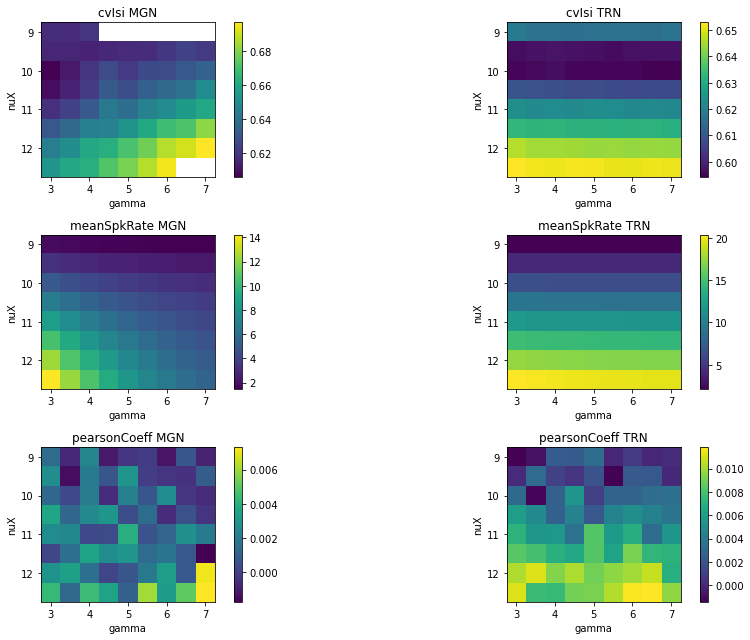

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

pipeline.makesubplot(df, fig, ax[0], "cvIsi")

pipeline.makesubplot(df, fig, ax[1], "meanSpkRate")

pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

In [31]:
! ls demyelination/data/exp1/activity/

'spk_exp1_nuX=10_gamma=10_nTRN=1000'  'spk_exp1_nuX=14_gamma=10_nTRN=1000'
'spk_exp1_nuX=10_gamma=10_nTRN=500'   'spk_exp1_nuX=14_gamma=10_nTRN=500'
'spk_exp1_nuX=10_gamma=2_nTRN=1000'   'spk_exp1_nuX=14_gamma=2_nTRN=1000'
'spk_exp1_nuX=10_gamma=2_nTRN=500'    'spk_exp1_nuX=14_gamma=2_nTRN=500'
'spk_exp1_nuX=10_gamma=3_nTRN=1000'   'spk_exp1_nuX=14_gamma=3_nTRN=1000'
'spk_exp1_nuX=10_gamma=3_nTRN=500'    'spk_exp1_nuX=14_gamma=3_nTRN=500'
'spk_exp1_nuX=10_gamma=4_nTRN=1000'   'spk_exp1_nuX=14_gamma=4_nTRN=1000'
'spk_exp1_nuX=10_gamma=4_nTRN=500'    'spk_exp1_nuX=14_gamma=4_nTRN=500'
'spk_exp1_nuX=10_gamma=5_nTRN=1000'   'spk_exp1_nuX=14_gamma=5_nTRN=1000'
'spk_exp1_nuX=10_gamma=5_nTRN=500'    'spk_exp1_nuX=14_gamma=5_nTRN=500'
'spk_exp1_nuX=10_gamma=6_nTRN=1000'   'spk_exp1_nuX=14_gamma=6_nTRN=1000'
'spk_exp1_nuX=10_gamma=6_nTRN=500'    'spk_exp1_nuX=14_gamma=6_nTRN=500'
'spk_exp1_nuX=10_gamma=7_nTRN=1000'   'spk_exp1_nuX=14_gamma=7_nTRN=1000'
'spk_exp1_nuX=10_gamma=7_nTRN=500'    'spk

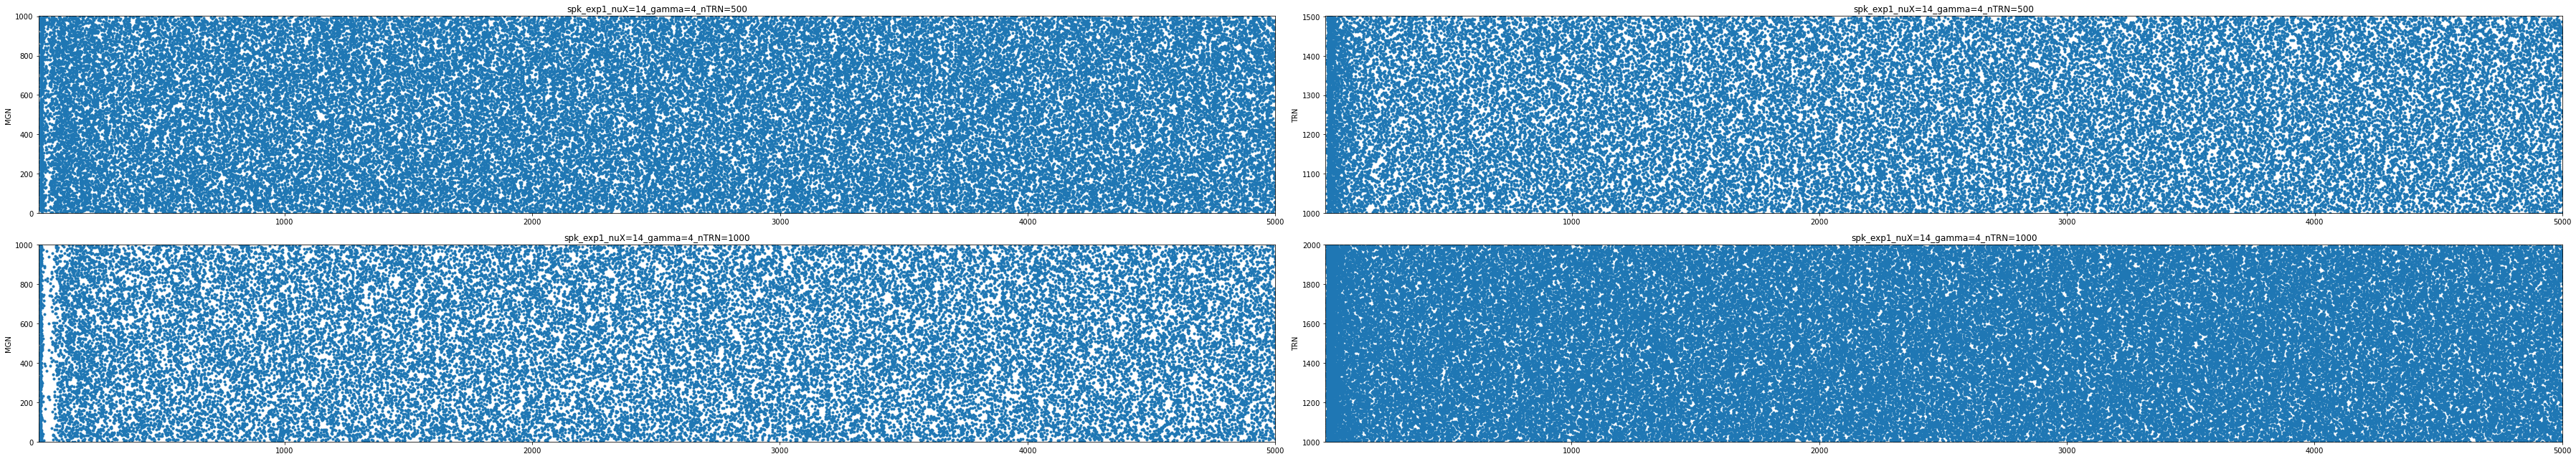

In [33]:
fls = [
    "spk_exp1_nuX=14_gamma=4_nTRN=500",
    "spk_exp1_nuX=14_gamma=4_nTRN=1000",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp1/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()

## Exp2

In [23]:
files = pipeline.readfiles("demyelination/data/exp2/activity");
df = preparedf(files, 'exp2');

In [24]:
df

nux  gamma brainPart  meanSpkRate  pearsonCoeff     cvIsi
8      8      2       MGN     1.720764      0.002109       NaN
130    8      2       MGN     1.865950     -0.001041  0.620675
152    8      2       TRN     6.110610      0.897147  1.859561
274    8      2       TRN     6.115123      0.892309  1.865903
107    8      3       MGN     1.813567      0.001933  0.615597
..   ...    ...       ...          ...           ...       ...
265   15      9       TRN    25.780969      0.783102  1.180975
116   15     10       MGN     8.901396      0.035330  0.820027
127   15     10       MGN     3.880454      0.123539  1.172265
260   15     10       TRN    26.236982      0.780742  1.176611
271   15     10       TRN    25.753370      0.783614  1.181465

[288 rows x 6 columns]

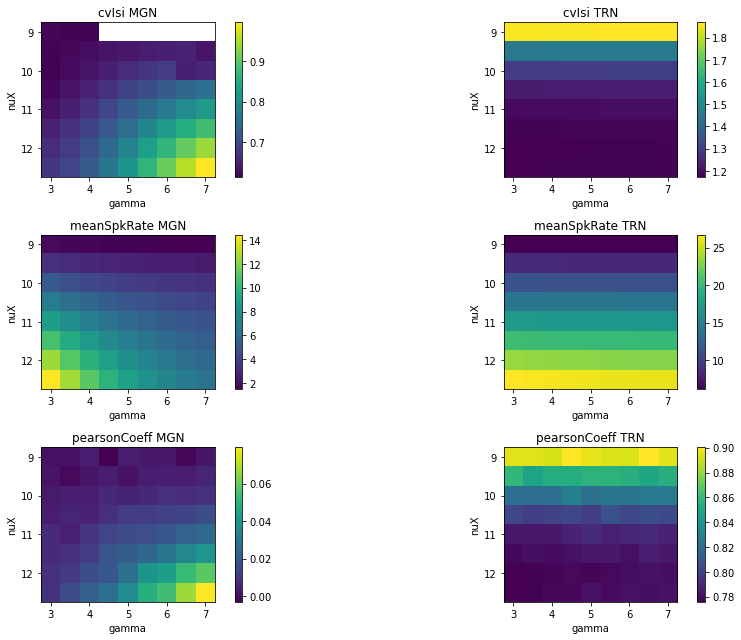

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

pipeline.makesubplot(df, fig, ax[0], "cvIsi")

pipeline.makesubplot(df, fig, ax[1], "meanSpkRate")

pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

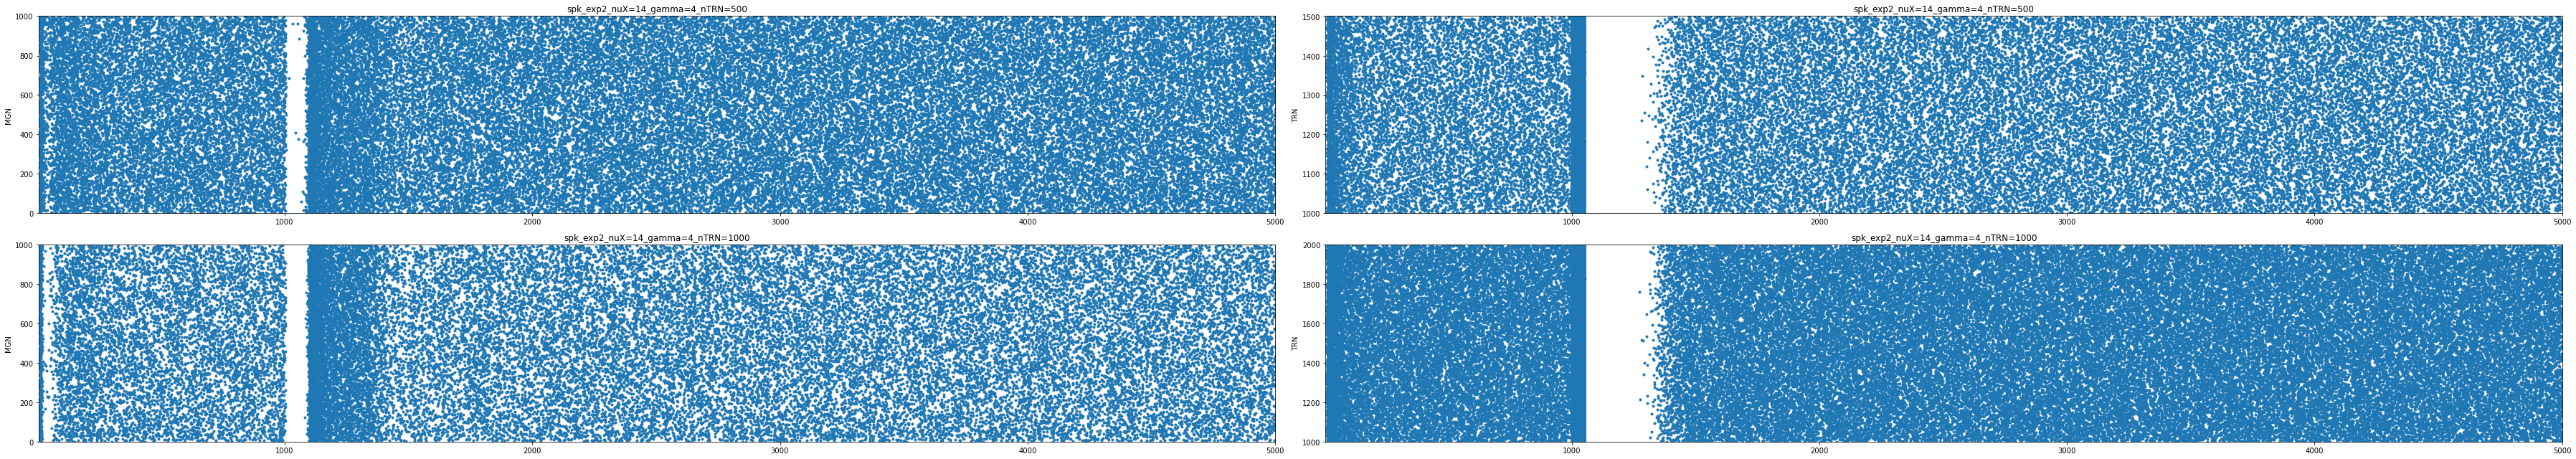

In [35]:
fls = [
    "spk_exp2_nuX=14_gamma=4_nTRN=500",
    "spk_exp2_nuX=14_gamma=4_nTRN=1000",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp2/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()